# Tractography-based clustering

In [1]:
import numpy as np
import scipy.sparse as ss
import nibabel as nib
import joblib
from nilearn import plotting
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
import seaborn as sns
sns.set()

/anaconda2/envs/python3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mat = ss.load_npz('data/total_121.npz').todense()
CC = np.corrcoef(mat)
CC = np.nan_to_num(CC)

In [3]:
labels = [KMeans(n_clusters=i).fit_predict(CC) + 1 for i in range(2,9)]

In [4]:
images = [np.zeros([91,109,91]) for l in labels]
coords = joblib.load('data/coords.pkl')

In [5]:
mask = nib.load('masks/MPFC_mask.nii.gz')
header = mask.header
affine = mask.affine
for l,i in zip(labels,images):
    i[coords['x'],coords['y'],coords['z']] = l
    header['cal_min'] = i.min()
    header['cal_max'] = i.max()
    file = nib.nifti1.Nifti1Image(i,affine=affine,header=header)
    nib.save(file,'images/dwi_k%d.nii.gz' % i.max())

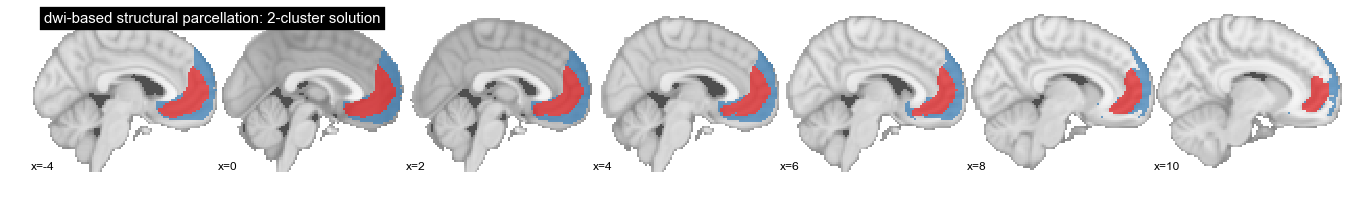

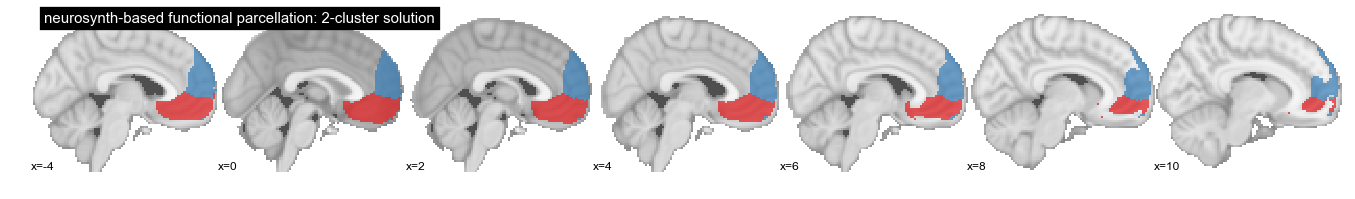

In [6]:
colors = ListedColormap(sns.color_palette('Set1',n_colors=2))
plotting.plot_roi('images/dwi_k2.nii.gz', display_mode='x', cmap=colors, draw_cross=False,title='dwi-based structural parcellation: 2-cluster solution')
plotting.plot_roi('images/cluster_labels_k2.nii.gz', display_mode='x', cmap=colors, draw_cross=False,title='neurosynth-based functional parcellation: 2-cluster solution')

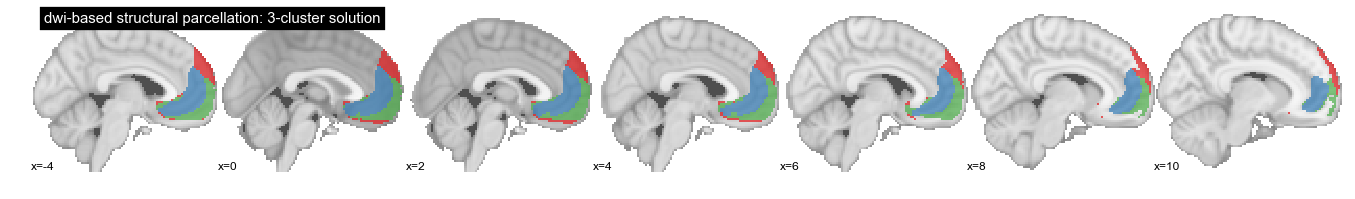

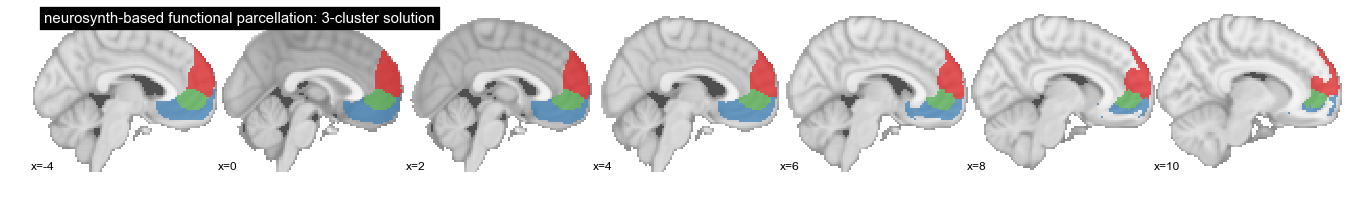

In [7]:
colors = ListedColormap(sns.color_palette('Set1',n_colors=3))
plotting.plot_roi('images/dwi_k3.nii.gz', display_mode='x', cmap=colors, draw_cross=False, title='dwi-based structural parcellation: 3-cluster solution')
plotting.plot_roi('images/cluster_labels_k3.nii.gz', display_mode='x', cmap=colors, draw_cross=False, title='neurosynth-based functional parcellation: 3-cluster solution')

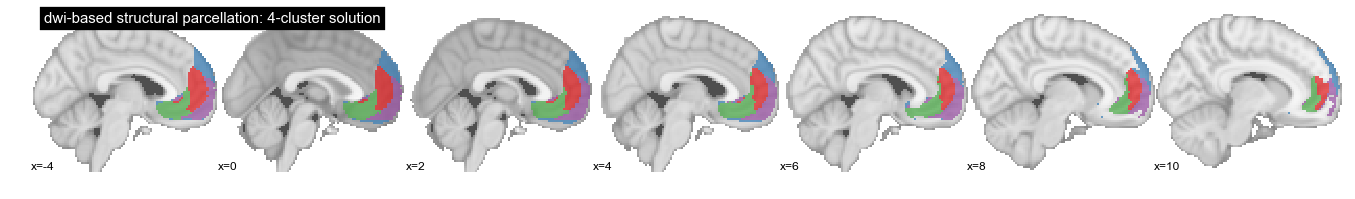

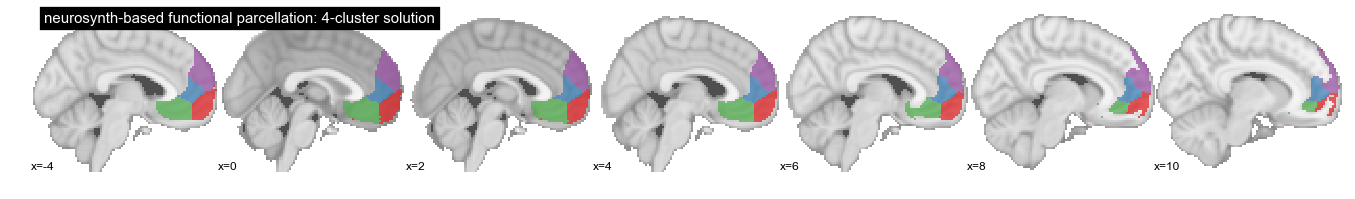

In [8]:
colors = ListedColormap(sns.color_palette('Set1',n_colors=4))
plotting.plot_roi('images/dwi_k4.nii.gz', display_mode='x', cmap=colors, draw_cross=False,title='dwi-based structural parcellation: 4-cluster solution')
plotting.plot_roi('images/cluster_labels_k4.nii.gz', display_mode='x', cmap=colors, draw_cross=False,title='neurosynth-based functional parcellation: 4-cluster solution')

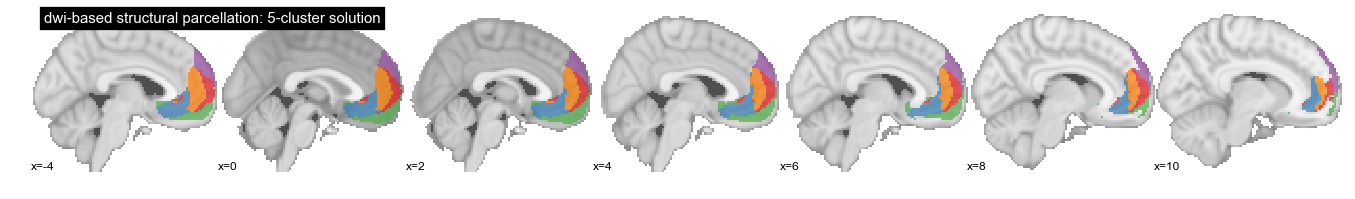

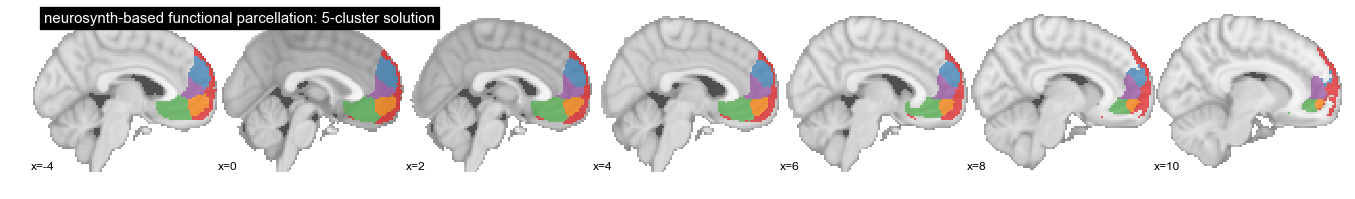

In [9]:
colors = ListedColormap(sns.color_palette('Set1',n_colors=5))
plotting.plot_roi('images/dwi_k5.nii.gz', display_mode='x', cmap=colors, draw_cross=False,title='dwi-based structural parcellation: 5-cluster solution')
plotting.plot_roi('images/cluster_labels_k5.nii.gz', display_mode='x', cmap=colors, draw_cross=False,title='neurosynth-based functional parcellation: 5-cluster solution')

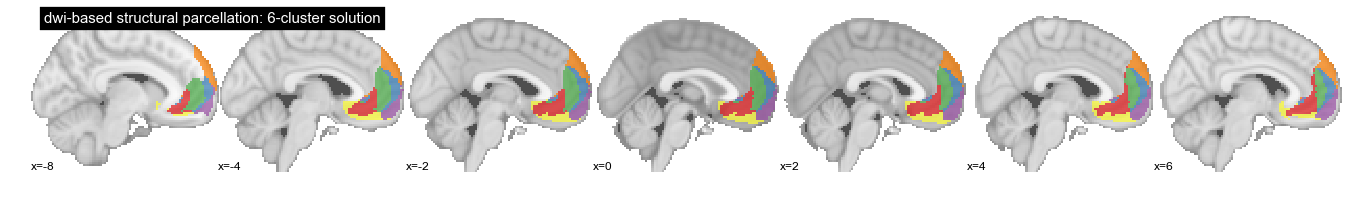

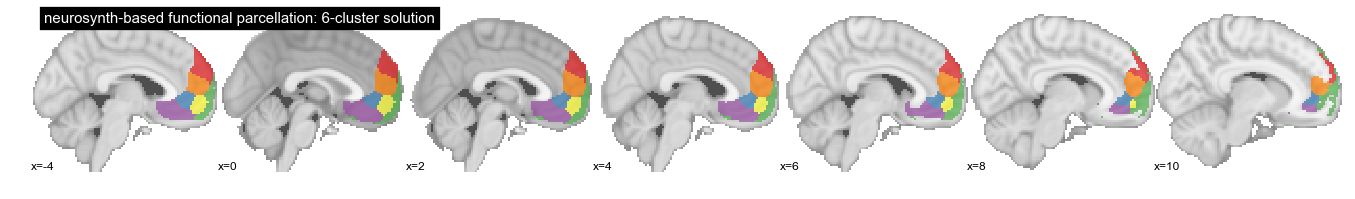

In [10]:
colors = ListedColormap(sns.color_palette('Set1',n_colors=6))
plotting.plot_roi('images/dwi_k6.nii.gz', display_mode='x', cmap=colors, draw_cross=False,title='dwi-based structural parcellation: 6-cluster solution')
plotting.plot_roi('images/cluster_labels_k6.nii.gz', display_mode='x', cmap=colors, draw_cross=False,title='neurosynth-based functional parcellation: 6-cluster solution')